In [16]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

In [17]:
# Print Version
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Pandas: 2.0.3
Numpy: 1.25.2


In [100]:
df_train_csv: pd.DataFrame = pd.read_csv("Dataset/Train.csv")
df_test_csv: pd.DataFrame = pd.read_csv("Dataset/Test.csv")

df_train_csv.info()
df_test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-n

In [19]:
# Concatenate the train and test datasets
df_original = pd.concat([df_train_csv, df_test_csv], axis=0)

# Summarize Dataset Scheme
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [20]:
# Dataset Size
row_count, col_count = df_original.shape
print(f"The dataset contains {row_count} rows and {col_count} columns.")

The dataset contains 10695 rows and 11 columns.


In [21]:
# Check for Duplicate Behavior
print(f"The ID attribute in the original dataset has {df_original['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

The ID attribute in the original dataset has 8363 unique values, and there are 10695 rows in total in the dataset.


In [22]:
# Interestingly, there are no duplicates in each dataset on their own
row_count, col_count = df_test_csv.shape
print(f"The ID attribute in the test dataset has {df_test_csv['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

row_count, col_count = df_train_csv.shape
print(f"The ID attribute in the training dataset has {df_train_csv['ID'].nunique()} unique values, and there are {row_count} rows in total in the dataset.")

The ID attribute in the test dataset has 2627 unique values, and there are 2627 rows in total in the dataset.
The ID attribute in the training dataset has 8068 unique values, and there are 8068 rows in total in the dataset.


In [23]:
# Check to see if they are actually duplicates
# Find duplicate IDs (these IDs are supposed to be unique)
duplicate_ids = df_original[df_original['ID'].duplicated(keep=False)]

# Sort the DataFrame by the 'ID' column to maintain the original order
sorted_duplicate_ids = duplicate_ids.sort_values(by='ID')

# Print some of the duplicate rows
print(sorted_duplicate_ids)

# TODO: Why are the numerics differing when the ID and categorical columns are the same???

          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
4977  458989  Female          Yes   42       Yes    Engineer              1.0   
0     458989  Female          Yes   36       Yes    Engineer              0.0   
6060  458994    Male          Yes   38       Yes  Healthcare              8.0   
1     458994    Male          Yes   37       Yes  Healthcare              8.0   
7523  458996  Female          Yes   71        No         NaN              1.0   
...      ...     ...          ...  ...       ...         ...              ...   
2622  467954    Male           No   29        No  Healthcare              9.0   
5499  467958  Female           No   43       Yes      Doctor              0.0   
2623  467958  Female           No   35       Yes      Doctor              1.0   
7172  467961    Male          Yes   45       Yes   Executive              1.0   
2625  467961    Male          Yes   47       Yes   Executive              1.0   

     Spending_Score  Family

In [24]:
# Check if the rows are exactly the same across all columns (not just ID)
duplicate_rows = df_original[df_original.duplicated(keep=False, subset=df_original.columns)]

# See if duplicate_rows is empty (aka no duplicate rows)
if duplicate_rows.empty:
    print("No duplicate rows found.")
else: 
    duplicate_rows_sorted = duplicate_rows.sort_values(by='ID')
    print("Duplicate rows found:")
    print(duplicate_rows_sorted)

Duplicate rows found:
          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
78    459223  Female          Yes   47       Yes      Doctor              1.0   
4562  459223  Female          Yes   47       Yes      Doctor              1.0   
104   459320    Male          Yes   26       Yes   Executive              0.0   
4916  459320    Male          Yes   26       Yes   Executive              0.0   
246   459763    Male           No   18        No      Artist              NaN   
...      ...     ...          ...  ...       ...         ...              ...   
193   467539    Male          Yes   48       Yes      Artist              NaN   
2506  467569    Male           No   19        No  Healthcare              NaN   
7865  467569    Male           No   19        No  Healthcare              NaN   
4745  467892    Male           No   23        No      Doctor              1.0   
2599  467892    Male           No   23        No      Doctor              1.0   

     

Conclusion: After concatenating the test and train data, we see 2332 IDs that were duplicated (AKA 4664 rows). However, looking at the test and train data frames separately, neither have duplicate IDs within themselves. We can conclude that some of the duplicates come from IDs being reused between the test and train data frames.

We also checked for completely identical rows, not just across ID, but across all columns. We found 76 rows that fit the description, meaning there are 38 instances that are exact duplicates.

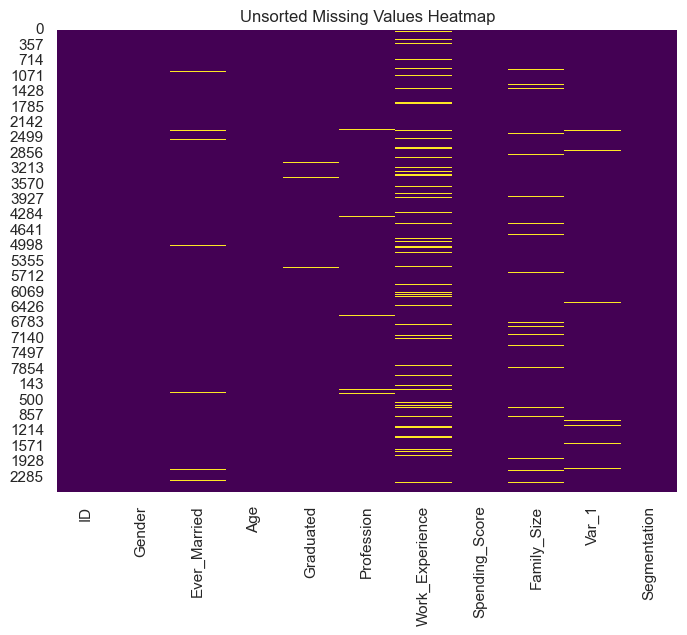

In [25]:
# Exploring Missing Data - ChatGPT 
# Create a boolean DataFrame where True indicates missing values

missing_values = df_original.isnull()

plt.figure(figsize=(8,6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Unsorted Missing Values Heatmap')
plt.show()

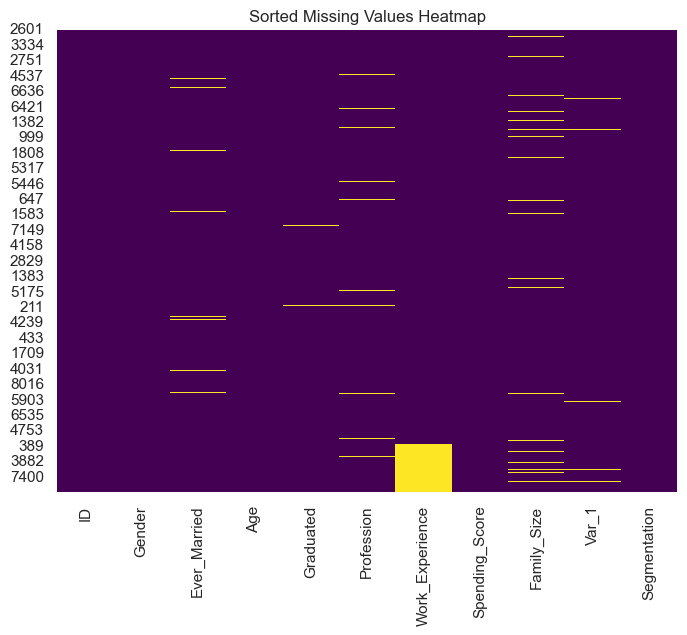

In [26]:
# Sorted by Work Experience
df_sorted_for_nan_transparency = df_original.sort_values(by="Work_Experience")

missing_values_post_sort = df_sorted_for_nan_transparency.isnull()


plt.figure(figsize=(8,6))
sns.heatmap(missing_values_post_sort, cmap='viridis', cbar=False)
plt.title('Sorted Missing Values Heatmap')
plt.show()

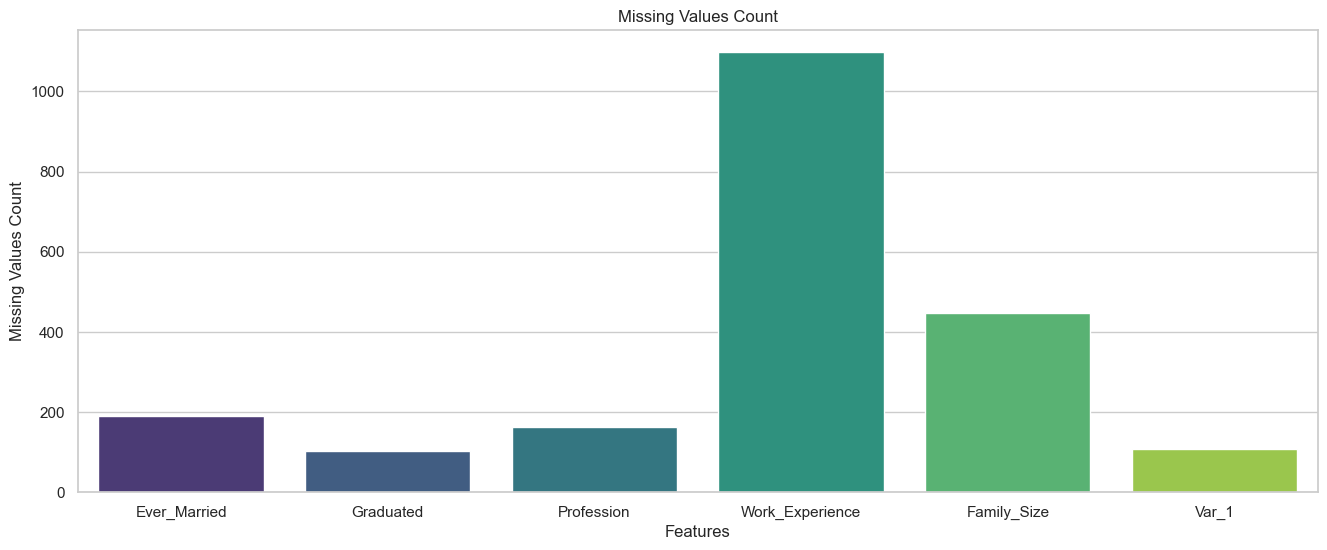

In [27]:
# Bar Plot of missing Values

# Find Missing Values (Sort)
missCount = df_original.isnull().sum()[df_original.isnull().sum() > 0]
sns.set(style = "whitegrid")
plt.figure(figsize = (16, 6))
sns.barplot(x = missCount.index, y = missCount.values, palette = "viridis")
plt.title('Missing Values Count')
plt.xlabel('Features')
plt.ylabel('Missing Values Count')
plt.show()

In [28]:
# Given the above, we might be tempted to discard Work_Experience
# Leaving it for now, because it kind of shows how long 
# the customer has been commuting to work

In [29]:
# Deleting Unnecessary Columns 
# Var_1 is an "Anonymised Category for the customer"
# ID is not going to help us classify customers
# Get rid of them!!!!
df_modified = df_original

for col in ['Var_1', 'ID']:
    if col in df_modified:
        del df_modified[col]
        
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10505 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10593 non-null  object 
 4   Profession       10533 non-null  object 
 5   Work_Experience  9597 non-null   float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10247 non-null  float64
 8   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 835.5+ KB


In [30]:
# Impute missing values -> ChatGPT
# For categorical types, lets impute with the mode.
df_modified['Profession'].fillna(df_modified['Profession'].mode()[0], inplace=True)
df_modified['Ever_Married'].fillna(df_modified['Ever_Married'].mode()[0], inplace=True)
df_modified['Graduated'].fillna(df_modified['Graduated'].mode()[0], inplace=True)

# For numeric types, lets impute with the mean.
df_modified['Work_Experience'].fillna(df_modified['Work_Experience'].mean(), inplace=True)
df_modified['Family_Size'].fillna(df_modified['Family_Size'].mean(), inplace=True)

# Verify there are no more null values
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10695 non-null  object 
 1   Ever_Married     10695 non-null  object 
 2   Age              10695 non-null  int64  
 3   Graduated        10695 non-null  object 
 4   Profession       10695 non-null  object 
 5   Work_Experience  10695 non-null  float64
 6   Spending_Score   10695 non-null  object 
 7   Family_Size      10695 non-null  float64
 8   Segmentation     10695 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 835.5+ KB


In [31]:
# Convert 'Segmentation' column values from A, B, C, D to 0, 1, 2, 3
segment_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
df_modified['Segmentation'] = df_modified['Segmentation'].replace(segment_mapping)

In [32]:
# One hot encode the categorical variables

# Gender (Male, Female)
# Ever_Married (No, Yes)
# Graduated (No, Yes)
# Profession (['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
# 'Doctor' 'Homemaker' 'Marketing'])
# Spending_Score (Low, Average, High)

# We must keep track of our target variable 'Segmentation'. 
# Separate it before one-hot encoding and then re-add it to the dataframe afterward.
target = df_modified['Segmentation']
df_modified.drop('Segmentation', axis=1, inplace=True)

df_one_hot_encoded = pd.get_dummies(df_modified, drop_first=False)
df_one_hot_encoded_int = df_one_hot_encoded.select_dtypes(include='bool').astype(int)

df_one_hot_encoded.update(df_one_hot_encoded_int)

df_one_hot_encoded['Segmentation'] = target

print(df_one_hot_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 2626
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10695 non-null  int64  
 1   Work_Experience           10695 non-null  float64
 2   Family_Size               10695 non-null  float64
 3   Gender_Female             10695 non-null  int32  
 4   Gender_Male               10695 non-null  int32  
 5   Ever_Married_No           10695 non-null  int32  
 6   Ever_Married_Yes          10695 non-null  int32  
 7   Graduated_No              10695 non-null  int32  
 8   Graduated_Yes             10695 non-null  int32  
 9   Profession_Artist         10695 non-null  int32  
 10  Profession_Doctor         10695 non-null  int32  
 11  Profession_Engineer       10695 non-null  int32  
 12  Profession_Entertainment  10695 non-null  int32  
 13  Profession_Executive      10695 non-null  int32  
 14  Profession_H

In [33]:
# 1 = True, 0 = False
print(df_one_hot_encoded) 

      Age  Work_Experience  Family_Size  Gender_Female  Gender_Male  \
0      22         1.000000          4.0              0            1   
1      38         2.619777          3.0              1            0   
2      67         1.000000          1.0              1            0   
3      67         0.000000          2.0              0            1   
4      40         2.619777          6.0              1            0   
...   ...              ...          ...            ...          ...   
2622   29         9.000000          4.0              0            1   
2623   35         1.000000          1.0              1            0   
2624   53         2.619777          2.0              1            0   
2625   47         1.000000          5.0              0            1   
2626   43         9.000000          3.0              1            0   

      Ever_Married_No  Ever_Married_Yes  Graduated_No  Graduated_Yes  \
0                   1                 0             1              0   
1  

In [34]:
# Feature Scaling (Standard Scalar)
stdscaler = StandardScaler()

# We'll scale only the features, not the target variable.
X = df_one_hot_encoded.drop('Segmentation', axis=1)
df_scaled = stdscaler.fit_transform(X)
y = df_one_hot_encoded['Segmentation']

### Breakdown of Variables (Post Pre-Processing)

In [35]:
# Provide mean, std, etc. for all variables (Summary Statistics) -> ChatGPT
# Convert the NumPy ndarray to a pandas DataFrame
df_converted = pd.DataFrame(df_scaled)

# Use pandas to compute and print summary statistics
summary_stats = df_converted.describe()

print("Summary Statistics:")
print(summary_stats)

# Note: Only columns 0, 1, and 2 (Age, Work_Experience, Family_Size)
# Are numeric. Columns 3 - 24 are categorical and have
# been one hot encoded.

Summary Statistics:
                 0             1             2             3             4   \
count  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04   
mean  -1.710750e-16  2.823569e-17 -6.776565e-17  8.670017e-17 -8.670017e-17   
std    1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00   
min   -1.520972e+00 -8.156593e-01 -1.226237e+00 -9.116041e-01 -1.096967e+00   
25%   -8.055522e-01 -8.156593e-01 -5.612681e-01 -9.116041e-01 -1.096967e+00   
50%   -1.497509e-01 -5.043124e-01  0.000000e+00 -9.116041e-01  9.116041e-01   
75%    5.656687e-01  1.183812e-01  7.686693e-01  1.096967e+00  9.116041e-01   
max    2.711927e+00  3.543196e+00  4.093513e+00  1.096967e+00  9.116041e-01   

                 5             6             7             8             9   \
count  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04  1.069500e+04   
mean   2.657476e-18  6.909438e-17  7.507371e-17 -7.507371e-17  2.125981e-17   
std    1.000047e+00  1.000047e+

## Training and Testing Split Argument

In [36]:
# Divide the data into training and testing splits
# Use an 80% training and 20% testing split
from sklearn.model_selection import train_test_split

# Including seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(df_scaled,y,test_size=0.2, random_state=38)

# X_train and y_train contain 80%, X_test and y_test contain the remaining 20%
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8556, 21), (8556,), (2139, 21), (2139,))

Argue "for" or "against" an 80/20 split. Why is the 80/20 split appropriate (or not) for your dataset?

# **Combined Class Logistic Regression**

In [165]:
# Import Statements

# Standard Stuff
import numpy as np
from numpy import ma # (Masked Array): Has NumPy Functions That Work With NaN Data
from numpy.linalg import pinv # Moore-Penrose Pseudoinverse
import math

# Sklearn Imports 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.optimize import fmin_bfgs, minimize_scalar # BFGS Algorithm: Extremely Common Optimization Algorithm

# Scipy Imports
from scipy.optimize import minimize_scalar

class MultiClassLogisticRegression:

    def __init__(self, eta, iterations = 10, C = 0.1, solver = "quasi", penalty = "l2", line_iters = 0.0):
        """
        MultiClassLogisticRegression Constructor

        Note: Internally We Will Store The Weights As self.w_ To Keep With Sklearn Conventions
        
        Parameters:
        - eta: Learning Rate
        - iterations: Number Of Iterations (Default: 20)
        - C: Regularization Strength (Default: 0.0001)
        - solver: Optimization Algorithm: ('steepest', 'stochastic', 'newton', 'quasi') (Default: 'quasi')
        - penalty: Regularization Penalty Type: ('none', 'l1', 'l2', 'both') (Default: 'l2')
        - line_iters: Number Iterations For Line Search (If Applicable)
        """
        self.eta = eta
        self.iters = iterations
        self.C = C
        self.solver = solver
        self.penalty = penalty
        self.line_iters = line_iters
        self.classifiers_ = []

    # Return Trained Status (String)
    def __str__(self):
        if hasattr(self, 'w_'):
            return 'MultiClass Logistic Regression Object With Coefficients:\n' + str(self.w_)
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    # ==============================
    # Convenience Methods (Private):
    # ==============================

    @staticmethod
    def _add_bias(X):

        # Add Bias Term
        return np.hstack((np.ones((X.shape[0], 1)), X))
    
    @staticmethod
    def _sigmoid(theta):

        # Increase Stability, Redefine Sigmoid Operation (1 / (1 + np.exp(-theta)))
        return expit(theta)
    
    # Defines Function With First Input To Be Optimized (Eta)
    @staticmethod
    def _objective_function_steepest(eta, X, y, w, grad, C, penalty):
        wnew = w - grad * eta
        g = expit(X @ wnew)

        # Regularization
        regularization = 0
        if penalty == "l1":
            regularization = C * np.sum(np.abs(wnew))
        elif penalty == "l2":
            regularization = C * np.sum(wnew**2)
        elif penalty == "both":
            regularization = C * (np.sum(np.abs(wnew)) + np.sum(wnew**2))

        # The Line Search Looks For Minimization, Take Negative Of Log Likelihood
        return -np.sum(ma.log(g[y == 1])) - ma.sum(np.log(1 - g[y == 0])) + regularization
    
    @staticmethod
    def _objective_function_bfgs(w, X, y, C, penalty):
        g = expit(X @ w)
        
        # Regularization
        regularization = 0
        if penalty == "l1":
            regularization = C * np.sum(np.abs(w))
        elif penalty == "l2":
            regularization = C * np.sum(w**2)
        elif penalty == "both":
            regularization = C * (np.sum(np.abs(w)) + np.sum(w**2))
        
        return -np.sum(ma.log(g[y == 1])) - np.sum(ma.log(1 - g[y == 0])) + regularization

    @staticmethod
    def _objective_gradient_bfgs(w, X, y, C, penalty):
        g = expit(X @ w)
        ydiff = y - g
        gradient = np.mean(X * ydiff[:, np.newaxis], axis=0)
        
        # Regularization
        gradient = gradient.reshape(w.shape)
        if penalty == "l1":
            gradient[1:] += -C * np.sign(w[1:])
        elif penalty == "l2":
            gradient[1:] += -2 * C * w[1:]
        elif penalty == "both":
            gradient[1:] += -C * (np.sign(w[1:]) + 2 * w[1:])
        
        return -gradient

    # ============================
    # Binary Probability Functions
    # ============================

    def _predict_proba_binary(self, X, w, add_bias = True):

        # Add Bias Term If Requested
        Xb = self._add_bias(X) if add_bias else X

        # Return Probability Of Class 1
        return self._sigmoid(Xb @ w)
    
    def _predict_binary(self, X):

        # Return Actual Prediction
        return (self._predict_proba_binary(X, self.w_) > 0.5)
    
    # ==================
    # Gradient Functions
    # ==================

    # Vectorized Gradient Calculation With Chosen Regularization
    def _get_gradient(self, X, y):

        # Get Difference, Make Column Vector And Multiply Through
        ydiff = y - self._predict_proba_binary(X, self.w_, add_bias = False).ravel()
        gradient = np.mean(X * ydiff[:, np.newaxis], axis = 0)
        
        # Regularization
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == "l1":
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == "l2":
            gradient[1:] += -2 * self.C * self.w_[1:]
        elif self.penalty == "both":
            gradient[1:] += -self.C * (np.sign(self.w_[1:]) + 2 * self.w_[1:])
        
        # Return Gradient
        return gradient
    
    # Stochastic Gradient Calculation
    def _get_gradient_stochastic(self, X, y):

        # Grab Random Instance, Get Difference, Make Column Vector And Multiply Through
        # np.random.seed(0) # For Debugging
        idx = int(np.random.rand() * len(y))
        ydiff = y[idx] - self._predict_proba_binary(X[idx], self.w_, add_bias = False) 
        gradient = X[idx] * ydiff[:, np.newaxis]
        
        # Regularization
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == "l1":
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == "l2":
            gradient[1:] += -2 * self.C * self.w_[1:]
        elif self.penalty == "both":
            gradient[1:] += -self.C * (np.sign(self.w_[1:]) + 2 * self.w_[1:])
        
        # Return Gradient
        return gradient
    
    # Newton's Method Gradient Calculation
    def _get_gradient_newton(self, X, y):

        # Get Sigmoid Value For All Classes, Calculate Hessian
        # Get Difference, Make Column Vector And Multiply Through
        g = self._predict_proba_binary(X, self.w_, add_bias = False).ravel()
        hessian = X.T @ np.diag(g * (1 - g)) @ X - 2 * self.C
        ydiff = y - g
        gradient = np.sum(X * ydiff[:, np.newaxis], axis = 0)
        
        # Regularization
        gradient = gradient.reshape(self.w_.shape)
        if self.penalty == "l1":
            gradient[1:] += -self.C * np.sign(self.w_[1:])
        elif self.penalty == "l2":
            gradient[1:] += -2 * self.C * self.w_[1:]
        elif self.penalty == "both":
            gradient[1:] += -self.C * (np.sign(self.w_[1:]) + 2 * self.w_[1:])
        
        # Return Gradient
        return pinv(hessian) @ gradient
    
    # ==============
    # Fit Functions
    # ==============

    def _fit_binary(self, X, y):

        # Add Bias Term
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
        
        # Initialize Weight Vectors To Zeros
        self.w_ = np.zeros((num_features, 1))
        
        # For Each Iteration (As Many As Max Iterations)
        for _ in range(self.iters):
            
            # Depending On Solver, Change Gradient Calculation
            if self.solver == "stochastic":
                # print("Stochastic Gradient Ascent Method")
                gradient = self._get_gradient_stochastic(Xb, y)
            elif self.solver == "newton":
                # print("Newton Method")
                gradient = self._get_gradient_newton(Xb, y)
            else:
                gradient = self._get_gradient(Xb, y)

            # Multiply By Learning Rate, Add B/C Maximizing
            self.w_ += gradient*self.eta

    def _fit_steepest(self, X, y):

         # Add Bias Term
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
        
        # Initialize Weight Vectors To Zeros
        self.w_ = np.zeros((num_features, 1))
        
        # For Each Iteration (As Many As Max Iterations)
        for _ in range(self.iters):

            # Get Gradient (Use Base Solver Since Steepest)
            # Minimization In Opposite Direction
            gradient = -self._get_gradient(Xb, y)
            
            # Do Line Search In Gradient Direction, Using Scipy Function
            opts = {'maxiter' : self.line_iters}

            # Minimize Scalar Function (Line Search)
            res = minimize_scalar(self._objective_function_steepest,                                # Objective Function To Optimize
                                  bounds = (0, self.eta * 10),                                      # Bounds To Optimize Over
                                  args = (Xb, y, self.w_, gradient, self.C, self.penalty),          # Additional Argument For Objective Function
                                  method = 'bounded',                                               # Bounded Optimization For Speed
                                  options = opts)                                                   # Set Maximum Iterations
            
            # Get Optimal Learning Rate, Set New Function Values, Subtract To Minimize
            eta = res.x
            self.w_ -= gradient * eta

    def _fit_bfgs(self, X, y):

        # Add Bias Term
        Xb = self._add_bias(X)
        num_samples, num_features = Xb.shape
        
        self.w_ = fmin_bfgs(self._objective_function_bfgs,                      # What To Optimize
                            np.zeros((num_features, 1)),                        # Starting Point
                            fprime = self._objective_gradient_bfgs,             # Gradient Function
                            args = (Xb, y, self.C, self.penalty),               # Extra Arguments For Gradient, Objective Function
                            gtol = 1e-03,                                       # Stopping Criteria For Gradient
                            maxiter = self.iters,                               # Stopping Criteria Iterations
                            disp = False)
        
        self.w_ = self.w_.reshape((num_features, 1))
    
    # =================
    # Public Functions:
    # =================
    
    def predict_proba(self, X):

        # Initialize Probabilities
        probs = []

        # Get Probability For Each Classifier
        for w in self.classifiers_:
            probs.append(self._predict_proba_binary(X, w).reshape((len(X), 1)))

        # Make Into Single Matrix
        return np.hstack(probs)
    
    def predict(self, X):

        # Take Argmax Along Row
        return np.argmax(self.predict_proba(X), axis = 1)

    def fit(self, X, y):

        # Store Unique Classes
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y))
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []

        # For Each Unique Value
        for i, yval in enumerate(self.unique_):

            # Create Binary Problem
            y_binary = np.array(y == yval).astype(int)
            
            # Train Binary Classifier For Class
            if self.solver == "steepest":
                # print("Steepest Ascent Method")
                self._fit_steepest(X, y_binary)
            elif self.solver == "quasi":
                # print("Quasi-Newton Method")
                self._fit_bfgs(X, y_binary)
            else:
                self._fit_binary(X, y_binary)

            # Add Trained Classifier To List
            self.classifiers_.append(self.w_)
            
        # Save All Weights Into One Matrix, Separate Column For Each Class
        self.w_ = np.hstack([w for w in self.classifiers_]).T

# Check Class Help
help(MultiClassLogisticRegression)

Help on class MultiClassLogisticRegression in module __main__:

class MultiClassLogisticRegression(builtins.object)
 |  MultiClassLogisticRegression(eta, iterations=10, C=0.1, solver='quasi', penalty='l2', line_iters=0.0)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, eta, iterations=10, C=0.1, solver='quasi', penalty='l2', line_iters=0.0)
 |      MultiClassLogisticRegression Constructor
 |      
 |      Note: Internally We Will Store The Weights As self.w_ To Keep With Sklearn Conventions
 |      
 |      Parameters:
 |      - eta: Learning Rate
 |      - iterations: Number Of Iterations (Default: 20)
 |      - C: Regularization Strength (Default: 0.0001)
 |      - solver: Optimization Algorithm: ('steepest', 'stochastic', 'newton', 'quasi') (Default: 'quasi')
 |      - penalty: Regularization Penalty Type: ('none', 'l1', 'l2', 'both') (Default: 'l2')
 |      - line_iters: Number Iterations For Line Search (If Applicable)
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 

Regularization of Intercept: As I mentioned earlier, typically in logistic regression, the intercept (or bias term) isn't regularized. You've correctly skipped the regularization for the intercept in the gradient, but make sure this is consistent across all parts of your implementation.

Regularization Strength: The regularization strength C in many libraries (like scikit-learn) is the inverse of the regularization term. That is, smaller values of C mean stronger regularization. Ensure you're using it in the manner you expect. In your objective function, a direct multiplication is a bit more intuitive, so larger values of C imply stronger regularization.

Stability with expit: The expit function is a stable version of the logistic sigmoid, so that's good. However, when working with very small or very large values, you might run into numerical stability issues. The expit function usually handles these well, but be cautious if you see any NaN or Inf values.

Scaling with Regularization: When using regularization, it's often a good idea to scale your features so that they have the same scale. This ensures that the regularization strength is applied uniformly to all features. If you haven't done this yet, consider using something like StandardScaler from scikit-learn on your features (but not the target) before training.

Convergence Criteria: The BFGS method you're using for optimization requires careful tuning. Ensure your stopping criteria (gtol, maxiter, etc.) are set appropriately. If the method isn't converging, consider adjusting these parameters.

# **Lol We Both Suck (Not Deep Learning Sucks)**

In [171]:
%%time
# def __init__(self, eta, iterations = 20, C = 0.0001, solver = "quasi", penalty = "l2", line_iters = 10):
# Instantiate Object
lr = MultiClassLogisticRegression(eta = 1.0, iterations = 10, C = 0.01, solver = 'quasi', penalty = 'l2')

# Fit Model
lr.fit(X_train, y_train)

# Print Coefficients
print(lr)

# Predict
y_pred = lr.predict(X_test)

# Accuracy
print('Accuracy: %.10f' % accuracy_score(y_test, y_pred))

MultiClass Logistic Regression Object With Coefficients:
[[-1.07900037 -0.02803355  0.04175965 -0.15124947 -0.00809485  0.00809485
  -0.02284706  0.02284706  0.02104246 -0.02104246 -0.00655953  0.04865369
   0.12026522  0.15242313  0.0101132  -0.2850175   0.01921966  0.06164299
  -0.05614553 -0.14217023 -0.01104274  0.13292666]
 [-1.29694335  0.13269688 -0.03939348 -0.03214726  0.00252068 -0.00252068
  -0.06063007  0.06063007 -0.05230022  0.05230022  0.10731913  0.01422686
   0.09380297  0.02646469  0.03725489 -0.20309633  0.02321457 -0.07212161
  -0.04395976  0.01493901  0.04456466 -0.04568421]
 [-1.41375665  0.25593254 -0.06075844  0.17311943  0.04805956 -0.04805956
  -0.03688642  0.03688642 -0.16653527  0.16653527  0.23527714  0.0096252
  -0.14218966 -0.05804412  0.01717794 -0.0680758  -0.05058126 -0.06550915
  -0.03686725  0.18872329  0.05994427 -0.20954417]
 [-1.17678406 -0.37010624  0.07704939 -0.02023811 -0.04771391  0.04771391
   0.08401714 -0.08401714  0.14936837 -0.14936837 -

https://www.kaggle.com/code/mauricioasperti/automobile-customer-segmentation-classification

Same accuracy as this bro too :(

In [168]:
%%time
# how do we compare now to sklearn?
from sklearn.linear_model import LogisticRegression

lr_sk = LogisticRegression(solver='lbfgs',n_jobs=1,
                           multi_class='ovr', C = 0.1, 
                           penalty='l2',
                          max_iter=50) # all params default
# note that sklearn is optimized for using the liblinear library with logistic regression
# ...and its faster than our implementation here

lr_sk.fit(X_train, y_train) # no need to add bias term, sklearn does it internally!!
print(lr_sk.coef_)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-0.06901667  0.04262039 -0.16616973 -0.01000321  0.01000321 -0.03117368
   0.03117368  0.02273964 -0.02273964 -0.00339788  0.05039281  0.13159111
   0.16553791  0.01744895 -0.32870417  0.01862981  0.08528706 -0.06348285
  -0.15387154 -0.01182197  0.14377244]
 [ 0.16398646 -0.03904991 -0.02037353  0.0025656  -0.0025656  -0.05300237
   0.05300237 -0.05268677  0.05268677  0.12311655  0.02187939  0.10714134
   0.03082743  0.0373401  -0.23113777  0.02938387 -0.09016526 -0.04697565
   0.01248601  0.04894589 -0.04673138]
 [ 0.34216404 -0.0537094   0.20716559  0.05214842 -0.05214842 -0.01175279
   0.01175279 -0.17307234  0.17307234  0.25538012  0.01687297 -0.15526577
  -0.06743049  0.01590004 -0.05008952 -0.05361243 -0.10484096 -0.03659197
   0.20584492  0.06549509 -0.22863692]
 [-0.54511508  0.07576082 -0.04368945 -0.04927724  0.04927724  0.0533843
  -0.0533843   0.14165799 -0.14165799 -0.3905289  -0.03571524 -0.0538686
  -0.07817714  0.04166582  0.34464985  0.01160555  0.25460851  0.128236

In [169]:
%%time
# actually, we aren't quite as good as the lib linear implementation
# how do we compare now to sklearn?
from sklearn.linear_model import LogisticRegression

lr_sk = LogisticRegression(solver='liblinear',n_jobs=1, 
                           multi_class='ovr', C = 1/0.001, 
                           penalty='l2',max_iter=100) 

lr_sk.fit(X_train,y_train) # no need to add bias term, sklearn does it internally!!
print(lr_sk.coef_)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

[[-0.07206141  0.04256078 -0.16702921 -0.01011622  0.01011622 -0.0317784
   0.0317784   0.02291129 -0.02291129 -0.00287124  0.05055367  0.1323789
   0.16645318  0.0179443  -0.33220246  0.01864877  0.08700519 -0.06405732
  -0.15492549 -0.01174481  0.14464168]
 [ 0.16586491 -0.03922889 -0.01991737  0.00245528 -0.00245528 -0.05258042
   0.05258042 -0.05263809  0.05263809  0.12411146  0.02242876  0.10811091
   0.03135056  0.03743994 -0.2333251   0.02989485 -0.09134306 -0.04723891
   0.01215407  0.04923956 -0.04665446]
 [ 0.34898223 -0.05331079  0.20998223  0.05242326 -0.05242326 -0.00967079
   0.00967079 -0.17367446  0.17367446  0.25665608  0.01762614 -0.15661161
  -0.06764572  0.01583352 -0.04903575 -0.05372468 -0.10749386 -0.03658531
   0.20702654  0.0657889  -0.22988935]
 [-0.55887342  0.07593905 -0.04611329 -0.04945509  0.04945509  0.05108125
  -0.05108125  0.14111652 -0.14111652 -0.39421162 -0.03699129 -0.05446473
  -0.07908439  0.04364819  0.34408588  0.01100158  0.2629806   0.128690

### Deployment - Custom Implementation or Scikit-Learn Implementation

Deployed machine learning models are integrated into real-world applications and are responsible for making predictions with unseen data. In this context, it's crucial that the model adds value.

Our logistic regression achieves 48.3% accuracy, and scikit-learn's implementation achieves 48.6% accuracy with this dataset, indicating a small difference in accuracy. Both models offer similar accuracy and business value.

However, we recommend using scikit-learn's logistic regression due to its established reputation for stability, reliability, and efficiency. It has undergone rigorous testing, boasts scalability, and is well-suited for production environments. Scikit-learn also provides advanced optimization techniques and is actively maintained, ensuring security and compatibility with software updates. These factors make scikit-learn the preferred choice for deployment over our custom implementation.

### Exceptional Work - Independent Component Analysis (ICA) To Improve Accuracy

When looking for exceptional work inspiration, we came across many other projects with the same dataset. Most of these projects achieved a similar accuracy with logistic regression. A logistic regression model may not be the best fit for this dataset. To explore other models that may achieve higher accuracy, we searched for projects with higher accuracies. 

As a result, we found Lucas Bruzzone's project that achieved 99% accuracy using this Customer Segmentation dataset. To achieve 0.99 accuracy with various models, Bruzzone used independent component analysis (ICA) to reduce dimensionality and make relationships clearer.

In [101]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import os
import seaborn as sns
import plotly.express as px

# Point train and test back to the originally read-in CSV data files
train = df_train_csv
test = df_test_csv

In the handle_missing_values() method, Bruzzone originally replaced the NaNs in each column as follows:
- Ever Married: "No"
- Graduated: "No"
- Profession: "Not Specified"
- Work Experience: 0
- Family Size: feature mean
- Var_1: "Unknown"

We disagreed with Bruzzone's processing because we felt that they were not best practice.

We do not need to replace or even consider Var_1, as discussed earlier. Furthermore, a better practice is to replace categorical NaNs with the mode. We agreed that replacing Work Experience NaNs with 0 is reasonable.

In [104]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
# Edited author's code to reflect how we cleaned our data above.
def handle_missing_values(df):
    # Replace NaN in Ever_Married with the mode
    df['Ever_Married'].fillna(df['Ever_Married'].mode()[0], inplace=True)

    # Replace NaN in Graduated with the mode
    df['Graduated'].fillna(df['Graduated'].mode()[0], inplace=True)

    # Replace NaN in Profession with the mode
    df['Profession'].fillna(df['Profession'].mode()[0], inplace=True)

    # Replace NaN in Work_Experience with 0
    df['Work_Experience'].fillna(0, inplace=True)

    # Replace NaN in Family_Size with the mean of valid values
    mean_family_size = round(df['Family_Size'].mean())
    df['Family_Size'].fillna(mean_family_size, inplace=True)

    # Delete ID and Var_1 columns
    del df['Var_1']
    del df['ID']
    
    return df

In [105]:
# Let's use the above function to clean and processing the training data
train = handle_missing_values(train)
train.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,0.0,High,6.0,A


Bruzzone created a Decomp class to visualize how patterns become easier to recognize when the dimensionality is reduced.

In [106]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, NMF, FastICA
from mpl_toolkits.mplot3d import Axes3D

class Decomp:
    def __init__(self, n_components, method="pca", scaler_method='standard'):
        self.n_components = n_components
        self.method = method
        self.scaler_method = scaler_method
        self.mixing_ = None
        
    def dimension_reduction(self, df):
        X_reduced = self.dimension_method(df)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def dimension_method(self, df):
        X = self.scaler(df)
        if self.method == "pca":
            pca = PCA(n_components=self.n_components, random_state=0)
            X_reduced = pca.fit_transform(X)
            self.comp = pca
        elif self.method == "nmf":
            nmf = NMF(n_components=self.n_components, random_state=0)
            X_reduced = nmf.fit_transform(X)
        elif self.method == "ica":
            comp = FastICA(n_components=self.n_components, whiten='unit-variance', random_state=0)
            X_reduced = comp.fit_transform(X)
            self.mixing_ = comp.mixing_  # Store the mixing_ matrix
        else:
            raise ValueError(f"Invalid method name")
        
        
        return X_reduced
    
    def get_mixing_matrix(self):
        if self.method == "ica":
            return self.mixing_
        else:
            raise ValueError("Mixing matrix is only available for ICA dimensionality reduction method.")
    
    
    def scaler(self, df):
        _df = df.copy()
        if self.scaler_method == "standard":
            return StandardScaler().fit_transform(_df)
        elif self.scaler_method == "minmax":
            return MinMaxScaler().fit_transform(_df)
        elif self.scaler_method == None:
            return _df.values
        else:
            raise ValueError(f"Invalid scaler_method name")
        
    def get_columns(self):
        return [f'{self.method.upper()}_{_}' for _ in range(self.n_components)]
    
    def get_explained_variance_ratio(self):
        return np.sum(self.comp.explained_variance_ratio_)
    
    def transform(self, df):
        X = self.scaler(df)
        X_reduced = self.comp.transform(X)
        if self.n_components == 2:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        elif self.n_components == 3:
            df_comp = pd.DataFrame(X_reduced, columns=[f'{self.method.upper()}_{_}' for _ in range(self.n_components)], index=df.index)
        return df_comp
    
    def decomp_plot(self, tmp, label, hue='genre'):
        if self.n_components == 2:
            # Gráfico 2D
            plt.figure(figsize=(16, 9))
            sns.scatterplot(x=f"{label}_0", y=f"{label}_1", data=tmp, hue=hue, alpha=0.7, s=100, palette='coolwarm');
            plt.title(f'{label} on {hue}', fontsize=20)
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=10)
            plt.xlabel(f"{label} Component 1", fontsize=15)
            plt.ylabel(f"{label} Component 2", fontsize=15)
        elif self.n_components == 3:
            # Gráfico 3D
            fig = plt.figure(figsize=(16, 9))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(tmp[f"{label}_0"], tmp[f"{label}_1"], tmp[f"{label}_2"], c=tmp[hue], cmap='coolwarm', s=100)
            ax.set_xlabel(f"{label} Component 1", fontsize=15)
            ax.set_ylabel(f"{label} Component 2", fontsize=15)
            ax.set_zlabel(f"{label} Component 3", fontsize=15)
            plt.title(f'{label} on {hue} (3D)', fontsize=20)
            fig.colorbar(scatter)
        plt.show()

Bruzzone also included code to encode the categorical values in the dataset. 

In [109]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
from sklearn.preprocessing import LabelEncoder

def encode_categorical_features(df):
    # Separate numeric and categorical columns, excluding the target column
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df.select_dtypes(include=['object']).columns.tolist()

    label_encoder_mappings = {}
    le = LabelEncoder()

    # Encode categorical columns
    for col in cat_cols:
        df[col] = le.fit_transform(df[col])
        label_encoder_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

    return df, label_encoder_mappings

train, label_encoder_mappings = encode_categorical_features(train)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3
1,0,1,38,1,2,0.0,0,3.0,0
2,0,1,67,1,2,1.0,2,1.0,1
3,1,1,67,1,7,0.0,1,2.0,1
4,0,1,40,1,3,0.0,1,6.0,0
...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0.0,2,7.0,3
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,3
8066,0,0,27,1,5,1.0,2,4.0,1


Bruzzone also included code to perform correlation analysis.

In [110]:
# Code from https://www.kaggle.com/code/lucasbruzzone/using-ica-to-improve-accuracy-0-99-accuracy
def plot_correlation_heatmap(df, target_column):
    # Calculate correlation matrix for numeric columns
    corr = df.corr(numeric_only=True)
    
    # Calculate correlation with the target column
    target_corr = corr[target_column].drop(target_column)
    
    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)
    
    # Select features with correlation values greater than or equal to 0.05 in absolute value
    target_corr_filtered = target_corr_sorted[abs(target_corr_sorted) >= 0.05]
    
    # Set the style and palette for the heatmap
    sns.set(font_scale=0.8)
    sns.set_style("white")
    sns.set_palette("PuBuGn_d")
    
    # Create a heatmap with the selected features
    sns.heatmap(target_corr_filtered.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {target_column}')
    plt.show()
    
    # Return the DataFrame with the selected features
    return target_corr_filtered.index.tolist()

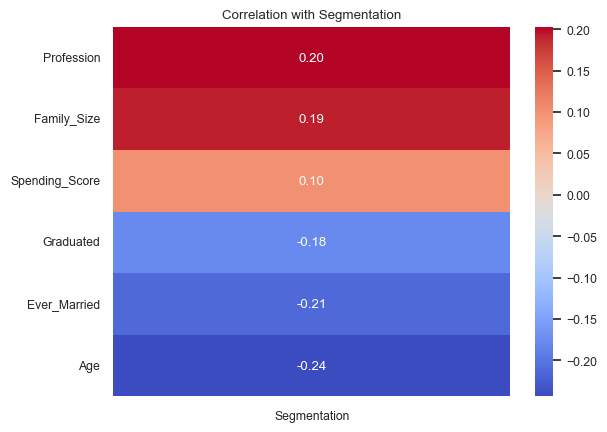

In [111]:
target_corr_filtered = plot_correlation_heatmap(train, 'Segmentation')

From the correlation analysis above, we note that "Profession" is positively correlated of 0.20 with "Segmentation", telling us that a customer's profession influences their segmentation. "Family_Size" and "Spending_Score" are also positively correlated with "Segmentation". This might be because the three categories are related, those with professions with a higher salary may have a higher spending score, and often can support larger families. 

We also see that "Graduated", "Ever_Married", and "Age" are negatively correlated with Segmentation. The 6 features above can be important when developing targeted marketing strategies for the various customer segments and provide insight to customer behavior.

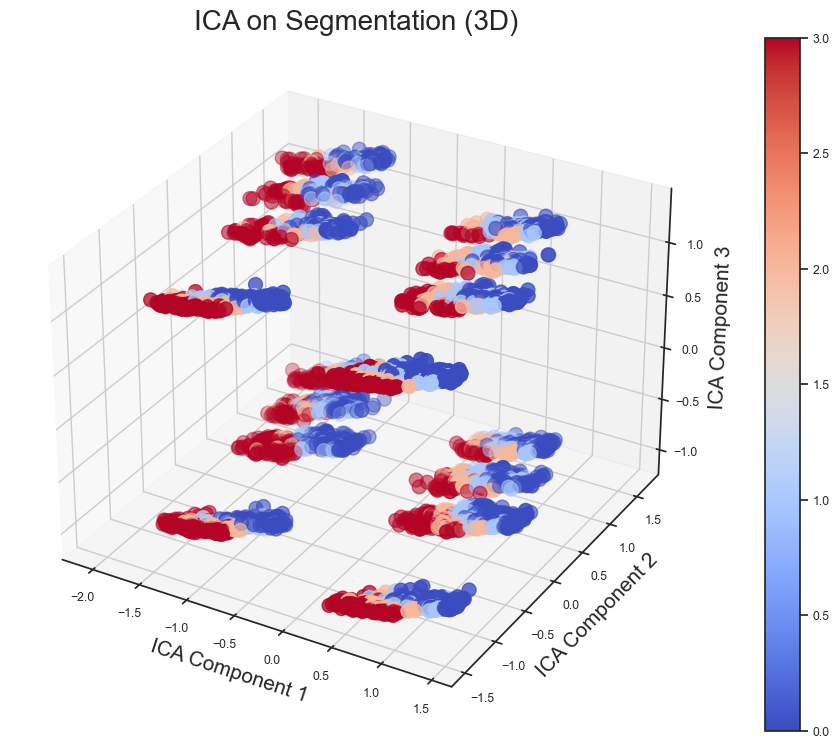

In [113]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 3D scatterplot to explore the distribution of data points
# in a reduced three-dimensional space obtained through ICA
data = train.copy()
method = 'ica'

# Plot based on the original training dataset
decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')

del data

The 3D scatterplot gives us insight into how well the ICA method separates the data points based on the "Segmentation" variable. We can determine the effectiveness of the dimensional analysis reduction and clustering by looking at how well data points with the same "Segmentation" value cluster together in the 3D space. They seem relatively well clustered based on their similar colors, but the clusters are not well separated between each other. 

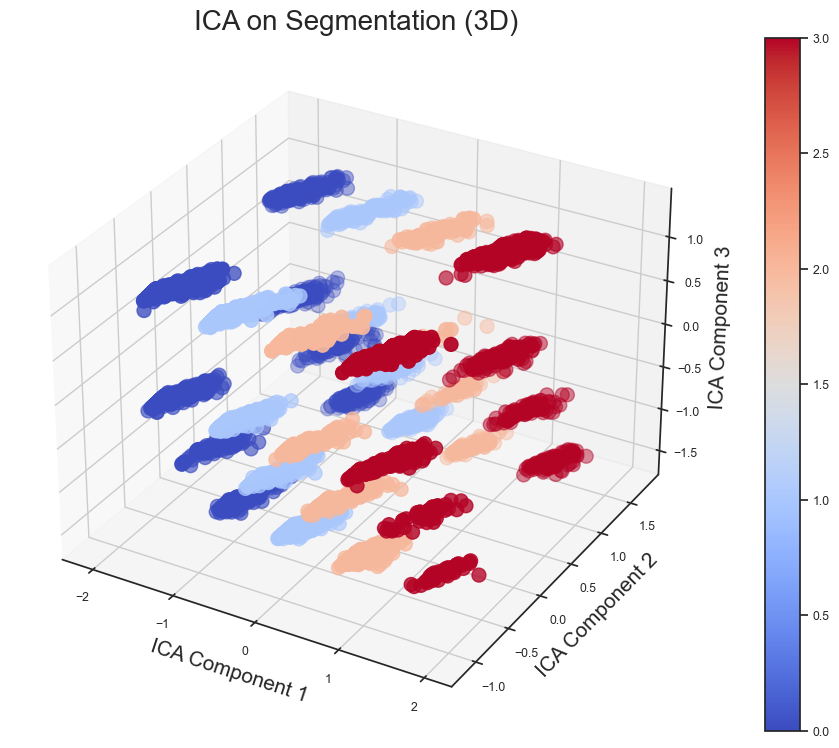

In [114]:
train_filtered = train[target_corr_filtered + ['Segmentation']]

data = train_filtered.copy()
method = 'ica'

# Plot based on the filtered training dataset
decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([train_filtered['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')   
del data

In the 2nd 3D scatterplot, we see much more cluster separation. That indicates that the the relationships are clearer between segmentation groups. Well-separated data such as this can improve a model's accuracy because the patterns are easier to discern. 

In [115]:
train_ica = decomp_feature.copy()

Now we can apply the same cleaning and processing methods to the test data before feeding it to models. We expect the result to be highly accurate, thanks to dimensionality reduction and separating clusters in a more predicatble way. 

In [116]:
# Handle missing values in the test data
test = handle_missing_values(test)

# Encode categorical features in the test data and store label encoding mappings
test, label_encoder_mappings = encode_categorical_features(test)

# Select only the relevant features (including target 'Segmentation') based on correlation
test_filtered = test[target_corr_filtered + ['Segmentation']]

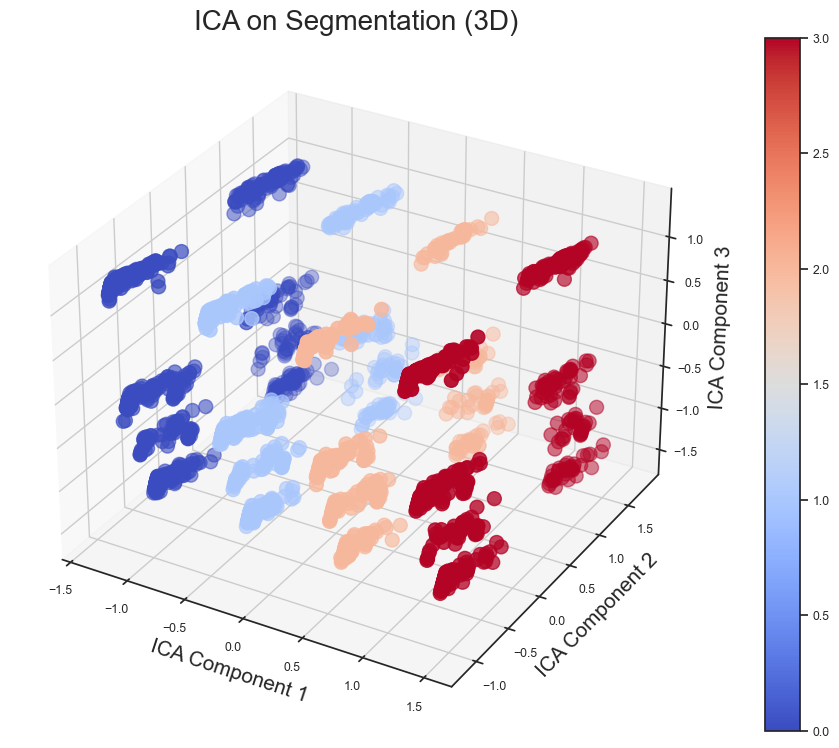

In [117]:
# Perform dimensionality reduction on the test data
data = test_filtered.copy()
method = 'ica'

decomp = Decomp(n_components=3, method=method, scaler_method='minmax')
decomp_feature = decomp.dimension_reduction(data)
decomp_feature = pd.concat([test_filtered['Segmentation'], decomp_feature], axis=1)
decomp.decomp_plot(decomp_feature, method.upper(), 'Segmentation')

del data

Once cleaning and processed, we can see that the test data points are well separated. We expect these well separated clusters to allow models to be more accurate when predicting a customer's segmentation.

In [119]:
test_ica = decomp_feature.copy()

Bruzzone created a method to train and test 4 models with the same data to compare their accuracy. He uses Random Forest, C5, HistGradientBoostingClassifier, and K-Nearest Neighbors algorithms to predict the "Segmentation" target variable.

In [122]:
def train_and_evaluate_models_train_test(train_df, test_df, target_col, df_name):
    # Separate features and the target column for training and test sets
    X_train = train_df.drop(target_col, axis=1).values
    y_train = train_df[target_col].values
    X_test = test_df.drop(target_col, axis=1).values
    y_test = test_df[target_col].values
    
    # Initialize a list to store the trained models and their accuracies
    trained_models = []

    # Random Forest
    random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
    random_forest_model.fit(X_train, y_train)
    random_forest_predictions = random_forest_model.predict(X_test)
    random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
    print(f"{df_name} - Random Forest Accuracy: {random_forest_accuracy:.2f}")
    trained_models.append(("Random Forest", random_forest_model, random_forest_accuracy))

    # C5 (Decision Tree)
    c5_model = DecisionTreeClassifier(random_state=42)
    c5_model.fit(X_train, y_train)
    c5_predictions = c5_model.predict(X_test)
    c5_accuracy = accuracy_score(y_test, c5_predictions)
    print(f"{df_name} - C5 Accuracy: {c5_accuracy:.2f}")
    trained_models.append(("C5", c5_model, c5_accuracy))

    # HistGradientBoostingClassifier
    hist_gradient_boosting_model = HistGradientBoostingClassifier(random_state=42)
    hist_gradient_boosting_model.fit(X_train, y_train)
    hist_gradient_boosting_predictions = hist_gradient_boosting_model.predict(X_test)
    hist_gradient_boosting_accuracy = accuracy_score(y_test, hist_gradient_boosting_predictions)
    print(f"{df_name} - HistGradientBoostingClassifier Accuracy: {hist_gradient_boosting_accuracy:.2f}")
    trained_models.append(("HistGradientBoostingClassifier", hist_gradient_boosting_model, hist_gradient_boosting_accuracy))

    # KNN (K-Nearest Neighbors)
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    print(f"{df_name} - KNN Accuracy: {knn_accuracy:.2f}")
    trained_models.append(("KNN", knn_model, knn_accuracy))

    return trained_models

In [123]:
# Assuming you have 'train' as the training dataset and 'test' as the test dataset
trained_models = train_and_evaluate_models_train_test(train_ica, test_ica, 'Segmentation', "Train data vs Test data")

Train data vs Test data - Random Forest Accuracy: 1.00
Train data vs Test data - C5 Accuracy: 0.96
Train data vs Test data - HistGradientBoostingClassifier Accuracy: 0.99
Train data vs Test data - KNN Accuracy: 0.94


The final result of the model evaluation on the test data is quite impressive. The models have accuracies ranging between 0.94 to 1. The models and preprocessing data with ICA drastically improved the model accuracies. 